# Determinant QMC data visualization

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
cwd = os.getcwd()
import seaborn as sns
sns.set()
sns.set_palette("Blues_r")
sns.set_style("white")
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

## Load simulation data

In [14]:
system = '2d-hc-nanoribbon'
N = 240
BETA = 4
U = 3
MU = 0
NY = 6
NX = int(N / NY / 2)

simDir = '../data/' + system + '/N' + str(N)\
+ '-BETA' + str(BETA) + '-U' + str(U) + '-MU' + str(MU) + '-NY' + str(NY)
plotDir = '../plots/' + system + '/N' + str(N)\
+ '-BETA' + str(BETA) + '-U' + str(U) + '-MU' + str(MU) + '-NY' + str(NY)

## Spin-spin correlations on the lattice

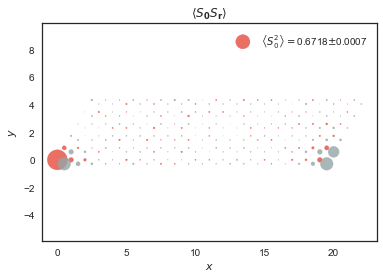

In [15]:
magCorr = np.loadtxt(simDir + '/EqTimeSzCorrelations.csv', skiprows = 1, delimiter = ',')
magCorrErr = np.loadtxt(simDir + '/EqTimeSzCorrelationsError.csv', skiprows = 1, delimiter = ',')

NMEAS = np.loadtxt(simDir + '/simulationParameters.csv', delimiter = ',', usecols = 1)[7]

dotscale = 600

a1 = np.arange(NX)
a2 = np.arange(NY)
vs = np.zeros((2 * NX * NY , 2))
clr = np.chararray((2 * NX * NY), itemsize = 10)
v1 = np.array([1, 0])
v2 = np.array([1 / 2, np.sqrt(3) / 2])
for i in range(NX):
    for j in range(NY):
        for k in range(2):
            vs[NX * NY * k + NX * j + i, :] =\
            a1[i] * v1 + a2[j] * v2 + k *\
            np.array([1 / 2,- 1 / ( 2 * np.sqrt(3) )])
            
            if magCorr[0, NX * NY * k + NX*j + i] > 0 :
                clr[NX * NY * k + NX * j + i] = "#e74c3c"
            else:
                clr[NX * NY * k + NX * j + i] = "#95a5a6"

fig, ax = plt.subplots()
ax.scatter(vs[:, 0], vs[:, 1], s = dotscale * abs(magCorr[0, :]),\
           c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = None,\
          label = r'$\left\langle S_0^2\right\rangle=$' + f'{magCorr[0, 0]:.4f}' + r'$\pm$' + f'{magCorrErr[0, 0]:.4f}')
plt.axis('equal')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$\left\langle S_{\mathbf{0}} S_{\mathbf{r}} \right\rangle$')
plt.legend()
plt.savefig(plotDir + '/CorrelationsDots.png', dpi = 350)

## Longitudinal correlations along one of the edges

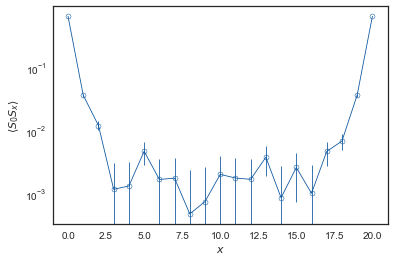

In [16]:
fig, ax = plt.subplots()

ax.errorbar(np.arange(NX+1), np.abs(np.hstack([magCorr[0, :NX],magCorr[0, 0]])),\
            linewidth = 0.8, elinewidth = 0.8,\
            marker = 'o', markersize = 0.5, markeredgewidth = 5,\
            yerr=np.abs(np.hstack([magCorrErr[0, :NX],magCorrErr[0, 0]])))
plt.xlabel(r'$x$')
plt.ylabel(r'$\left\langle S_{0} S_{x} \right\rangle$')
plt.yscale('log')
#plt.ylim(-0.1, 0.1)
plt.savefig(plotDir + '/LongitudinalProfile.png', dpi = 350)